In [75]:
import numpy as np

from scipy.stats import gmean,hmean, beta

from plotly.offline import iplot
import plotly.graph_objects as go
import chart_studio.plotly as py


# Fixed distance example

In [69]:
n = 50
mu= 100
sigma=40

t_i = sigma * np.random.randn(n) + mu
x_i = 1000*np.ones(n)
v_i = x_i/t_i

amount_of_samples = int(0.7*n)
sample_indices = np.random.choice(n, amount_of_samples, replace=False)
sampled_v_i = v_i[sample_indices]

harmonic_mean_v = hmean(sampled_v_i)
arithmetic_mean_v = np.mean(sampled_v_i)
geometric_mean_v = gmean(sampled_v_i)

x_predicted_harmonic = harmonic_mean_v*t_i
x_predicted_geometric = geometric_mean_v*t_i
x_predicted_arithmetic  = arithmetic_mean_v*t_i

In [70]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() ,x_i.sum()

(48049.38962016385, 57796.635258347866, 52199.48756000718, 50000.0)

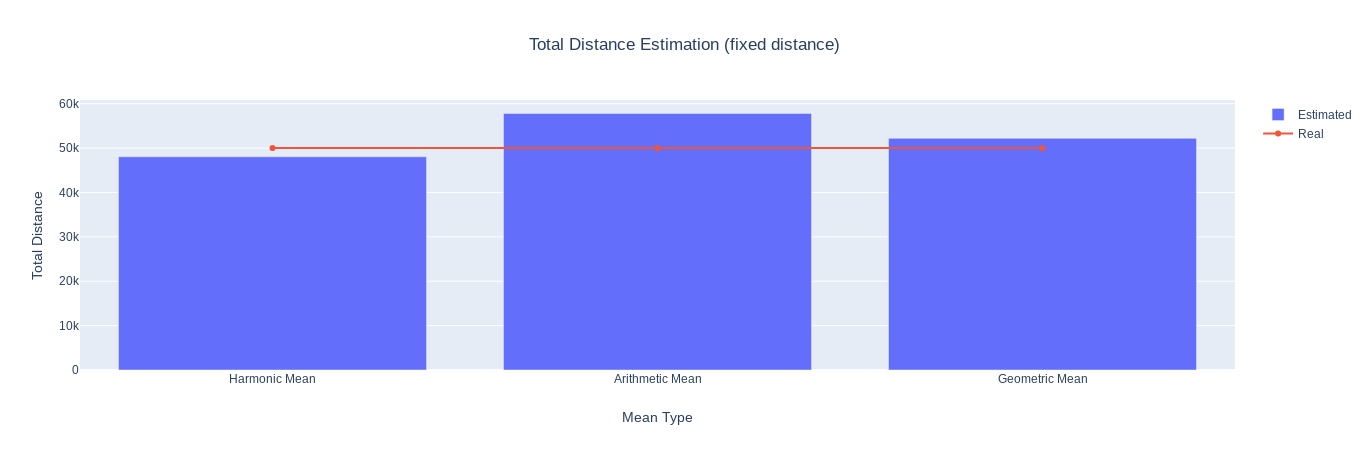

In [77]:
x_axis = ['Harmonic Mean','Arithmetic Mean','Geometric Mean']

layout = go.Layout(title={'text':'Total Distance Estimation (fixed distance)','x':0.5},xaxis_title='Mean Type', yaxis_title='Total Distance')

fig = go.Figure(data=[go.Bar(x=x_axis,y=[(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum()],name="Estimated"),
                      go.Scatter(x=x_axis,y=[x_i.sum()]*3,name='Real')],
               layout=layout)
py.plot(fig, filename='Total Distance Estimation (fixed distance)')
iplot(fig)

# Fixed time example

In [46]:
n = 30
mu= 100
sigma=30

x_i = sigma * np.random.randn(n) + mu
t_i = 10*np.ones(n)
v_i = x_i/t_i

amount_of_samples = int(0.7*n)
sample_indices = np.random.choice(n, amount_of_samples, replace=False)
sampled_v_i = v_i[sample_indices]

harmonic_mean_v = hmean(sampled_v_i)
arithmetic_mean_v = np.mean(sampled_v_i)
geometric_mean_v = gmean(sampled_v_i)

x_predicted_harmonic = harmonic_mean_v*t_i
x_predicted_geometric = geometric_mean_v*t_i
x_predicted_arithmetic  = arithmetic_mean_v*t_i

In [47]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() ,x_i.sum()

(2766.7328069329296,
 3005.4169796865554,
 2891.9318624430102,
 3101.7534159310526)

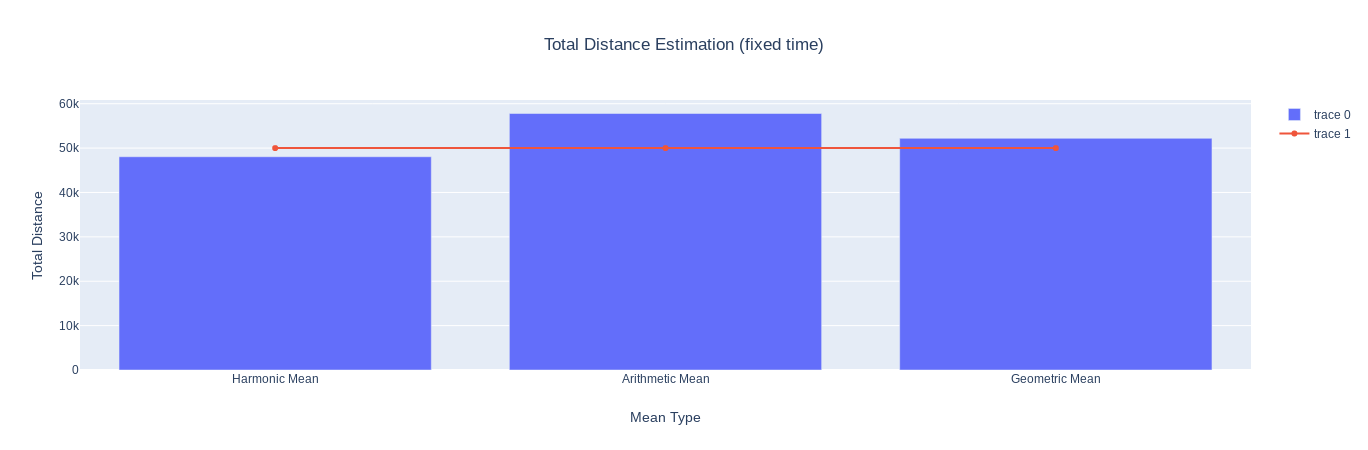

In [78]:
x_axis = ['Harmonic Mean','Arithmetic Mean','Geometric Mean']

layout = go.Layout(title={'text':'Total Distance Estimation (fixed time)','x':0.5},xaxis_title='Mean Type', yaxis_title='Total Distance')

fig = go.Figure(data=[go.Bar(x=x_axis,y=[(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum()]),
                      go.Scatter(x=x_axis,y=[x_i.sum()]*3)],
                layout=layout)

py.plot(fig, filename='Total Distance Estimation (fixed time)')

iplot(fig)

# Population example

In [133]:
horizon = 150
mu=1.2
sigma=0.1
alpha_t = sigma * np.random.randn(horizon) + mu

amount_of_samples = int(0.7*horizon)

sample_indices = np.random.choice(horizon, amount_of_samples, replace=False)

sampled_alpha_t = alpha_t[sample_indices]

geometric_mean_alpha = gmean(sampled_alpha_t)
arithmetic_mean_alpha = np.mean(sampled_alpha_t)
harmonic_mean_alpha = hmean(sampled_alpha_t)

initial_population = 10
population =  initial_population*np.cumproduct(np.concatenate((np.array([1]),alpha_t)))
estimated_population_geometric = initial_population*np.geomspace(1, geometric_mean_alpha**horizon, num=horizon+1)
estimated_population_arithmetic = initial_population*np.geomspace(1, arithmetic_mean_alpha**horizon, num=horizon+1)
estimated_population_harmonic = initial_population*np.geomspace(1, harmonic_mean_alpha**horizon, num=horizon+1)

In [134]:
geometric_mean_alpha, arithmetic_mean_alpha, harmonic_mean_alpha

(1.196186092803115, 1.2001493680356194, 1.1922885126104643)

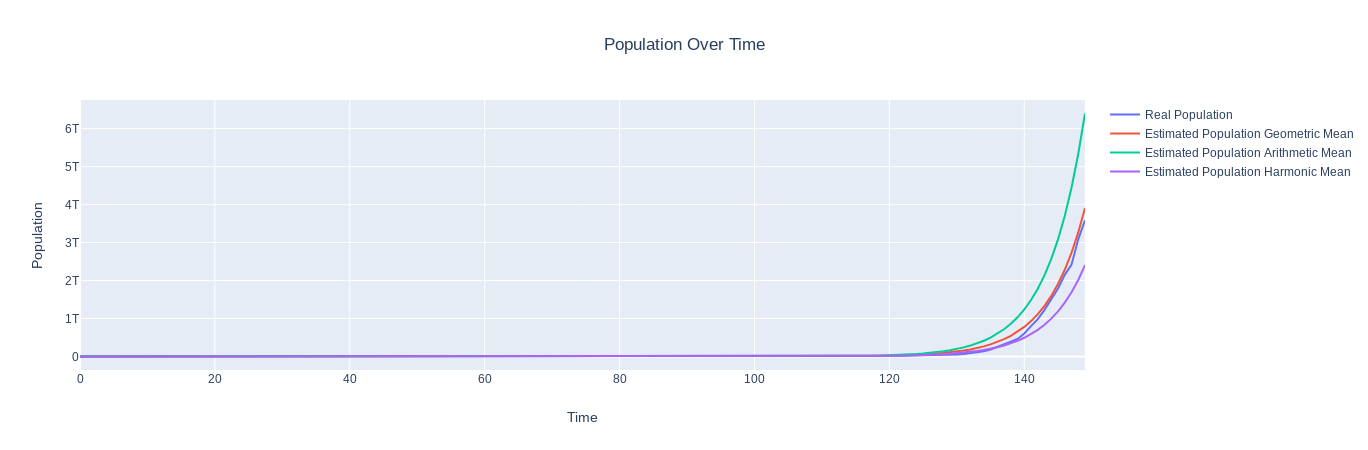

In [136]:
layout = go.Layout(title={'text':'Population Over Time','x':0.5},xaxis_title='Time', yaxis_title='Population')

fig = go.Figure(data=[go.Scatter(x=list(range(horizon)),y=population,name='Real Population'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_geometric,name='Estimated Population Geometric Mean'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_arithmetic,name='Estimated Population Arithmetic Mean'),
                      go.Scatter(x=list(range(horizon)),y=estimated_population_harmonic,name='Estimated Population Harmonic Mean')],
               layout=layout)

py.plot(fig,filename='Population Over Time')
iplot(fig)